<a href="https://colab.research.google.com/github/sehan25/ESAA-2022-2/blob/main/Session/1128-TensorFlow-Fashion%20MNIST%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기본 분류: 의류 이미지 분류

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.2


## 패션 MNIST 데이터셋 임포트하기

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


- 이미지: 28x28 크기의 넘파이 배열
- 픽셀 값: 0과 255 사이
- 레이블(label): 0에서 9까지의 정수 배열, 이미지에 있는 옷의 클래스(class)

In [4]:
# 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 탐색

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

## 데이터 전처리

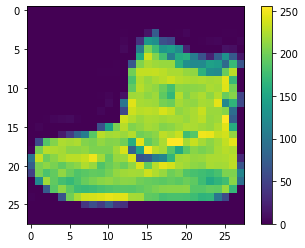

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

- 신경망 모델에 주입하기 전에 값의 범위를 0~1 사이로 조정
- 훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요함

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

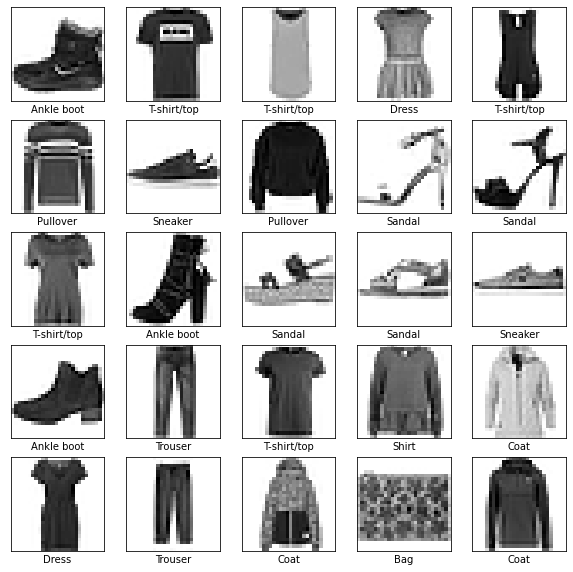

In [12]:
# 훈련 세트에서 처음 25개 이미지와 그 아래 클래스 이름 출력
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 구성

### 층 구성
- 첫 번째 층 `tf.keras.layers.Flatten`: 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환
    - 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘림
    - 학습되는 가중치가 없고 데이터를 변환하기만 함
- 두 개의 `tf.keras.layers.Dense` 층: 밀집 연결(densely-connected) 또는 완전 연결(fully-connected) 층
    - 첫 번째 Dense 층은 128개의 노드(또는 뉴런)를 가짐
    - 두 번째 (마지막) 층은 10개의 노드의 소프트맥스(softmax) 층
        - 10개의 확률을 반환하고 반환된 값의 전체 합은 1. 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

### 모델 컴파일
- 손실 함수: 훈련 중 모델이 얼마나 정확한지 측정
    - 모델을 올바른 방향으로 "조정"하려면 이 함수를 최소화해야 함
- 옵티마이저: 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트되는 방식
- 메트릭: 훈련 및 테스트 단계를 모니터링하는 데 사용

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 모델 훈련
1. 훈련 데이터를 모델에 주입 - train_images, train_labels
2. 모델이 이미지와 레이블을 매핑하는 방법을 배움
3. 테스트 세트에 대한 모델의 예측을 만듦 - test_images
4. 예측이 test_labels 배열의 레이블과 일치하는지 확인

### 모델 피드

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4954 - accuracy: 0.8260
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3745 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3358 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3116 - accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2936 - accuracy: 0.8921
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2797 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2670 - accuracy: 0.9008
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2579 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2478 - accuracy: 0.9086
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.238

### 정확도 평가

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3285 - accuracy: 0.8864 - 655ms/epoch - 2ms/step

Test accuracy: 0.8863999843597412


- 훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 과대적합(overfitting) 때문

### 예측하기
- 모델의 선형 출력, 로짓. 소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환

In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [19]:
# 첫 번째 예측 확인
predictions[0]

array([6.2184301e-07, 2.2303113e-09, 2.1879679e-07, 4.9406684e-11,
       4.3238719e-09, 1.7057832e-03, 5.8833433e-07, 9.7219106e-03,
       9.4933288e-09, 9.8857087e-01], dtype=float32)

- &rarr; 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냄

In [20]:
# 가장 높은 신뢰도를 가진 레이블 찾기
np.argmax(predictions[0])

9

- 값이 맞는지 테스트 레이블 확인

In [21]:
test_labels[0]

9

- 10개 클래스에 대한 예측을 모두 그래프로 표현

In [22]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

In [23]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 예측 확인

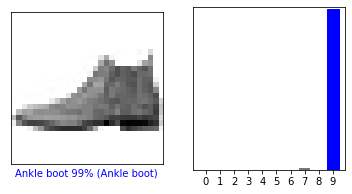

In [24]:
# 0번째 원소의 이미지, 예측, 신뢰도 점수 배열 확인
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

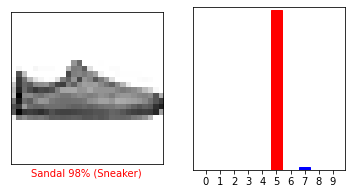

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

- 몇 개의 이미지의 예측을 출력해보기
    - 올바르게 예측된 레이블 - 파란색, 잘못 예측된 레이블 - 빨강색
    - 숫자: 예측 레이블의 신뢰도 퍼센트(100점 만점).
        - 신뢰도 점수가 높을 때도 잘못 예측할 수 있음

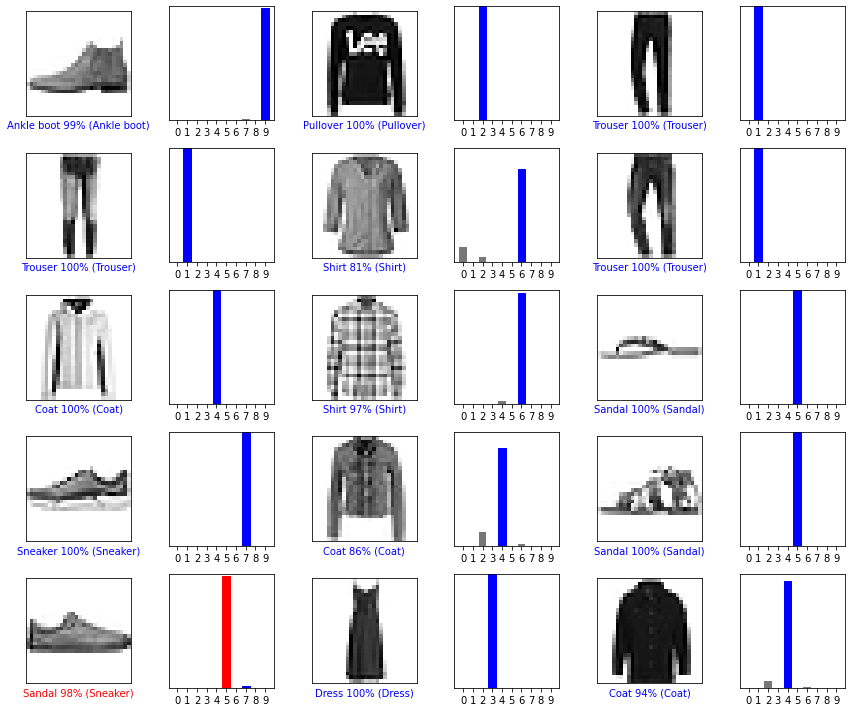

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 훈련된 모델 사용하기
- 훈련된 모델을 사용하여 한 이미지에 대한 예측 만들기

In [27]:
# Grab an image from the test dataset
img = test_images[1]
print(img.shape)

(28, 28)


- tf.keras 모델은 한 번에 샘플의 묶음 또는 배치(batch)로 예측을 만드는데 최적화되어 있음
- 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 함

In [28]:
# Add the image to a batch where it's the only member
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [29]:
# 이미지 예측 만들기
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 23ms/step
[[4.3688156e-05 2.1052996e-11 9.9919397e-01 4.7993763e-07 4.1472685e-04
  1.0202569e-11 3.4715151e-04 5.4023264e-10 4.4974634e-08 1.0930898e-12]]


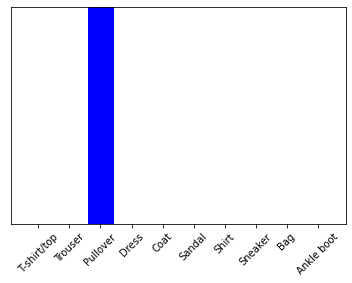

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [31]:
np.argmax(predictions_single[0])

2